# Zachary Kruse
## 3/11/25
### This project analyzes survey results from students at County College of Morris (CCM) to provide insights that can help guide the CCM IT Department’s recruiting and messaging efforts.

# https://www.w3schools.com/python/matplotlib_bars.asp
# https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp

# What are the most frequently enrolled courses among students in the survey?

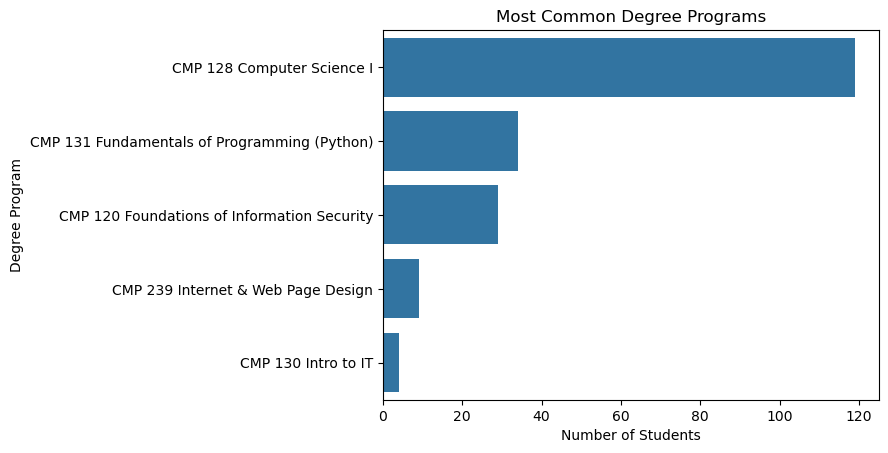

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("cleaned_survey.csv")
# Count occurrences of each enrolled course
course_counts = df["which_course_are_you_enrolled_in?"].value_counts()
# Plot bar chart
sns.barplot(y=course_counts.index, x=course_counts.values)
plt.xlabel("Number of Students")
plt.ylabel("Degree Program")
plt.title("Most Common Degree Programs")
plt.show()

# CMP 128 Computer Science I is the most common course.
## CMP 128 is the entry point for many students—ensure it remains accessible and engaging.

# How interested are students in taking additional computing courses?

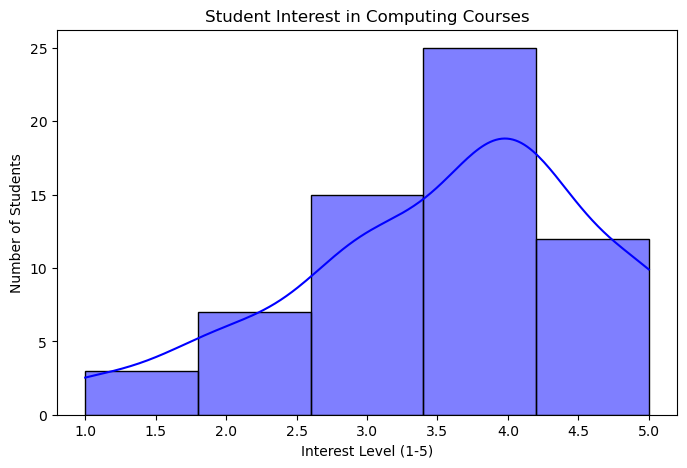

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["on_a_scale_of_1_to_5,_with_1_being_not_at_all_interested_and_5_being_extremely_interested,_how_interested_are_you_in_taking_more_computing_classes?"],
             bins=5, kde=True, color="blue")
plt.xlabel("Interest Level (1-5)")
plt.ylabel("Number of Students")
plt.title("Student Interest in Computing Courses")
plt.show()


# The distribution shows that most students have moderate to high interest (3-5 scale), with very few selecting 1 or 2.
## If students are hesitant, it could be due to course difficulty, workload, or career uncertainty.

# What factors impact students decisions to enroll at CCM?

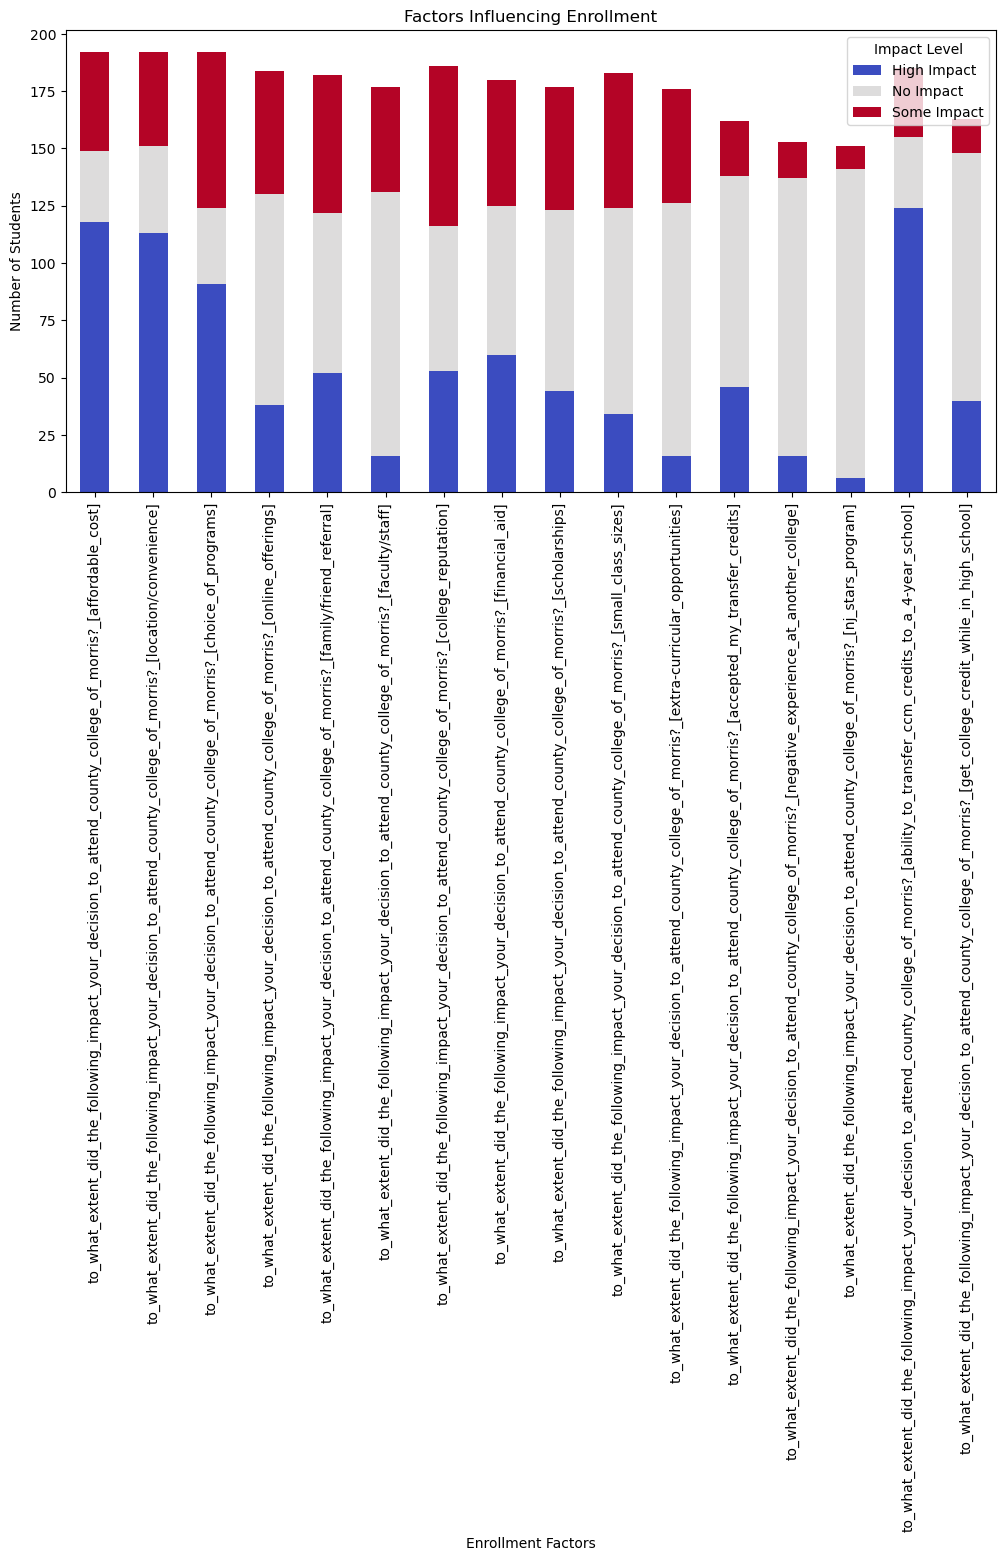

In [18]:
# Select relevant columns
impact_cols = [col for col in df.columns if "to_what_extent_did_the_following_impact" in col]

# Count responses for each factor
impact_counts = df[impact_cols].apply(pd.Series.value_counts)

# Plot a stacked bar chart
impact_counts.T.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Enrollment Factors")
plt.ylabel("Number of Students")
plt.title("Factors Influencing Enrollment")

plt.legend(title="Impact Level")
plt.show()

# Top Factors Impacting Enrollment: Affordable cost, Location/convenience, Choice of programs, and Ability to transfer credits.
## Since cost is the most important factor, emphasize how CCM provides high-quality computing education at an affordable price.

# How do race/ethnicity demographics differ between computing majors and non-majors?

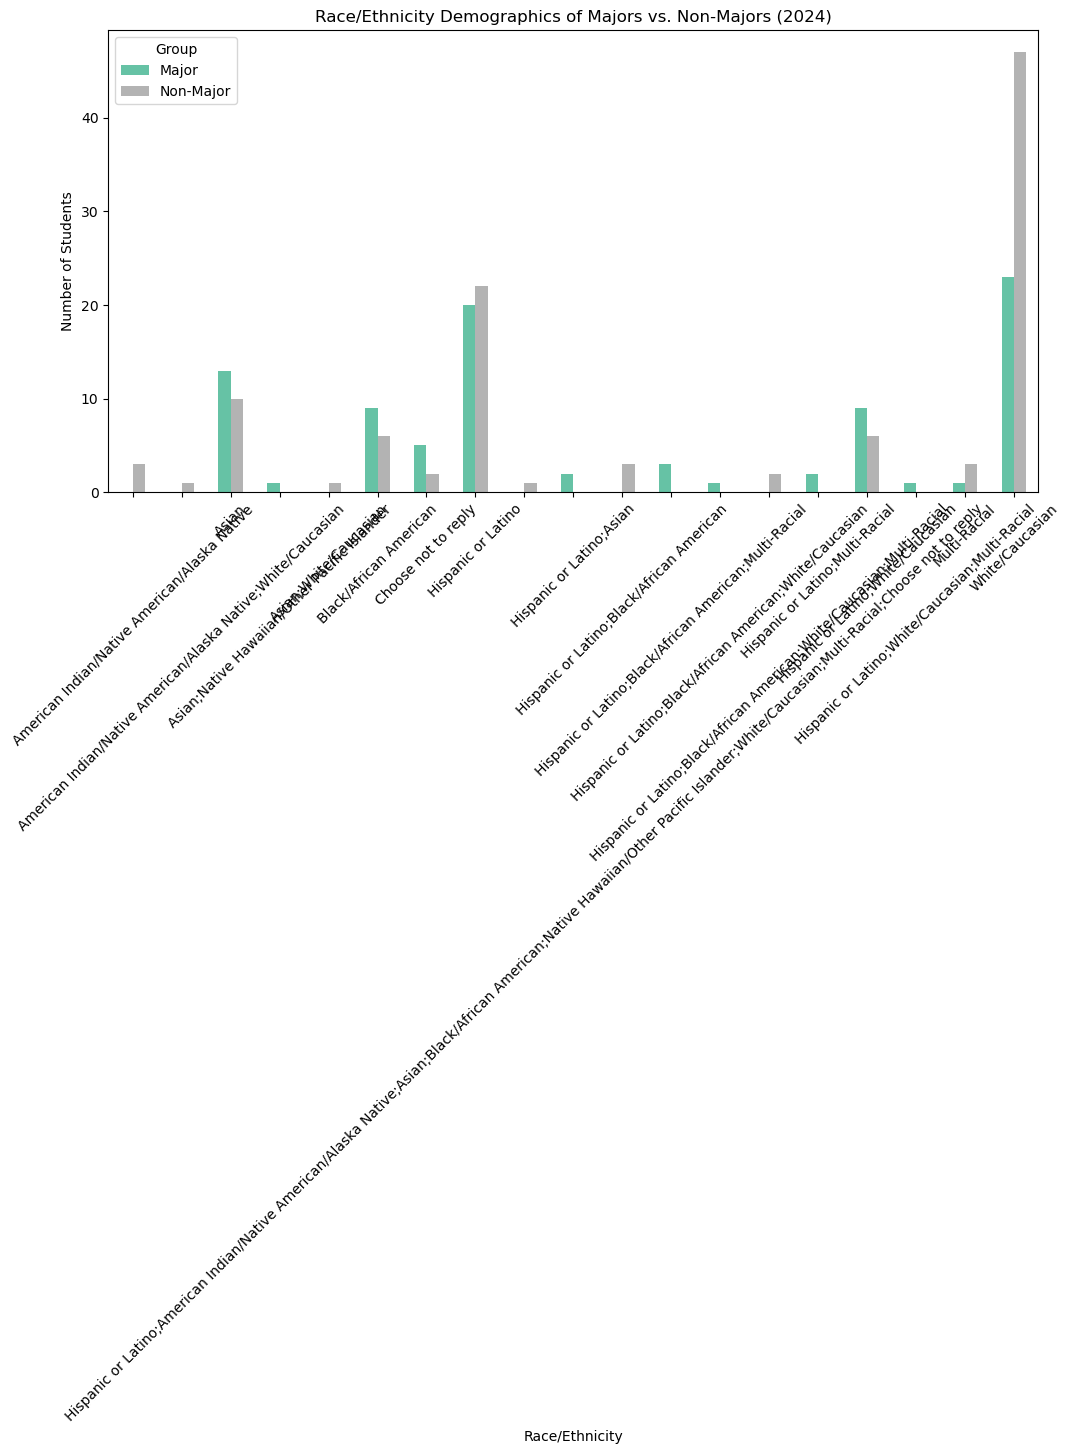

In [19]:
# Create a column to classify Major vs. Non-Major
df["Major_Status"] = df["was_a_computing_major/certificate_your_first_choice,_or_did_you_change_majors_from_a_different_ccm_program?_if_you_changed_majors,_indicate_what_your_first_major_was."].apply(
    lambda x: "Major" if x == "First Choice" else "Non-Major"
)

# Count respondents by race/ethnicity for Majors and Non-Majors
race_counts = df.groupby(["race/ethnicity", "Major_Status"]).size().unstack()

# Plot grouped bar chart
race_counts.plot(kind="bar", figsize=(12, 6), colormap="Set2")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Number of Students")
plt.title("Race/Ethnicity Demographics of Majors vs. Non-Majors (2024)")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.show()

# White/Caucasian students make up the largest proportion of both computing majors and non-majors.
## Hispanic/Latino students are underrepresented in computing compared to non-majors.
### Black/African American students are slightly underrepresented in computing majors compared to non-majors.
#### Asian students are more likely to enroll in computing majors than non-majors.
##### Multi-racial and Native American students are among the least represented in computing majors.